# Problema 1: Regresión Polinomial

En clase ya vimos un caso particular de este tipo de modelos: la regresión cuadrática. En general, un modelo de regresión polinomial se puede expresar como:

$$Y_i = \beta_0 + \beta_1 \ X_i +\beta_2 \ X_i^2 + ... + \beta_n \ X_i^n + u_i. $$

En este ejercicio veremos la importancia de la elección del grado $n$ del polinomio en la regresión.

**1.**<br/>
a) Utilizando la función `random.normal` de `numpy` genera un arreglo de 40 números aleatorios $X$ con distribución $\mathcal{N}(2,3)$. Esta será la variable aleatoria $X$ que utilizaremos en los siguientes puntos.<br/>
b) Calcula la variable dependiente $Y$ mediante la siguiente ecuación polinomial: $Y = X - 2X^2 + \frac{1}{2}X^3 + U$ donde $U$, de manera análoga al inciso anterior, es una variable aleatoria con distribución $\mathcal{N}(-3,3)$.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#from sklearn.linear_model import LinearRegression

# a)
np.random.seed(0)
no_datos=30
X = 2 - 3 * np.random.normal(0, 1, no_datos) 

#b)
U = np.random.normal(-3, 3, no_datos)
Y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + U

**2.**<br/>
a)Utilizando la función `OLS` de `statsmodels.api` que vimos en clase, genera una regresión polinomial para polinomios de grado $n=1,2,3,4,7,10,15,20\ y\ 30$. **Hint:** Análogo al ejercicio de regresión logarítmica que vimos en el laboratorio, transforma la variable dependiente ($X$), generando una nueva columna en el dataframe para cada transformación: $X^2, X^3,...,X^{30}$ (todos los enteros entre 2 y 30) y selecciona las variables a utilizar en cada una de las regresiones lineales según el valor de $n$ (por ejemplo, para $n=10$ debes incluir  todas las columnas desde X hasta X^10, i.e. X,X^2,X^3,...,X^10).<br/> 
b)Grafica los datos y las regresiones generadas en el inciso anterior. 

In [2]:
def generar_dataframe(x,u,n):
    
    y= x - 2*(x**2) + 0.5*(x**3) + u
    dictionary={'Y':y,'X':x}
    data_df=pd.DataFrame(dictionary)

    for n in range(1,n+1):
        col_name= 'X'+str(n)
        data_df[col_name]=data_df['X']**n
    return data_df

data_df=generar_dataframe(X,U,30)
data_df.head(5)

,Y,X,X1,X2,X3,X4,X5,X6,X7,X8,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,-45.344600,-3.292157,-3.292157,10.838298,-35.681379,117.468703,-386.725416,1273.160801,-4191.445292,13798.896118,...,-7.363621e+10,2.424220e+11,-7.980911e+11,2.627441e+12,-8.649950e+12,2.847699e+13,-9.375073e+13,3.086421e+14,-1.016098e+15,3.345155e+15
1,-2.088928,0.799528,0.799528,0.639246,0.511095,0.408635,0.326715,0.261218,0.208851,0.166983,...,9.109856e-03,7.283588e-03,5.823435e-03,4.656002e-03,3.722606e-03,2.976329e-03,2.379659e-03,1.902605e-03,1.521187e-03,1.216232e-03
2,-8.762858,-0.936214,-0.936214,0.876497,-0.820588,0.768246,-0.719243,0.673365,-0.630414,0.590202,...,-2.505401e-01,2.345592e-01,-2.195976e-01,2.055903e-01,-1.924765e-01,1.801992e-01,-1.687050e-01,1.579440e-01,-1.478693e-01,1.384373e-01
3,-110.939095,-4.722680,-4.722680,22.303703,-105.333241,497.455149,-2349.321282,11095.091688,-52398.563147,247461.625117,...,-1.438660e+14,6.794330e+14,-3.208744e+15,1.515387e+16,-7.156688e+16,3.379874e+17,-1.596206e+18,7.538371e+18,-3.560131e+19,1.681336e+20
4,-56.984950,-3.602674,-3.602674,12.979260,-46.760041,168.461183,-606.910720,2186.501454,-7877.251875,28379.170289,...,-4.887921e+11,1.760959e+12,-6.344160e+12,2.285594e+13,-8.234250e+13,2.966532e+14,-1.068745e+15,3.850339e+15,-1.387151e+16,4.997455e+16


n = 1 :  ['X1']


/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


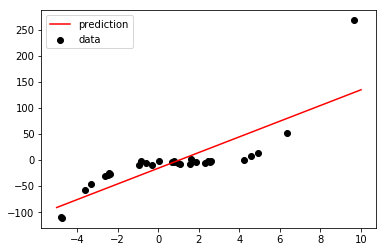

n = 2 :  ['X1', 'X2']


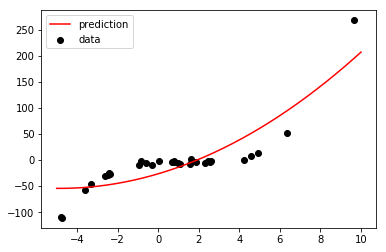

n = 3 :  ['X1', 'X2', 'X3']


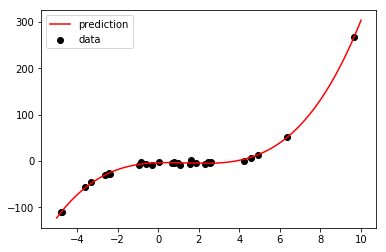

n = 4 :  ['X1', 'X2', 'X3', 'X4']


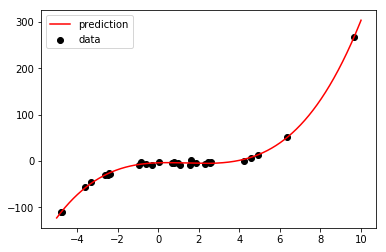

n = 7 :  ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']


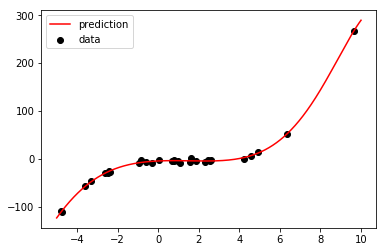

n = 10 :  ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']


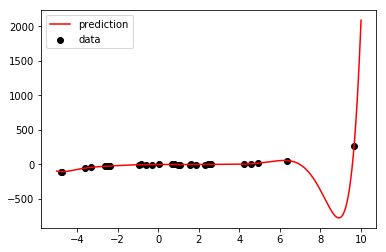

n = 15 :  ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']


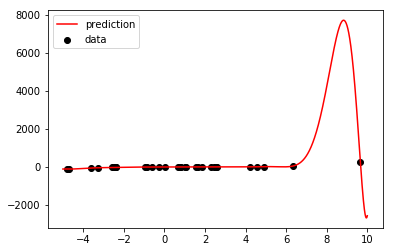

n = 20 :  ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20']


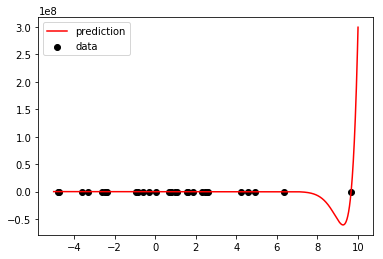

n = 30 :  ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30']


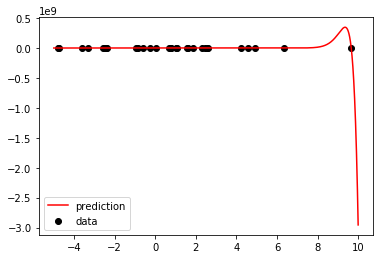

In [64]:
#correr una regresión lineal para cada n y graficarlo
import statsmodels.api as sm

lista_n=[1,2,3,4,7,10,15,20,30]

modelos_lineales=[]

for n in lista_n:
    
    #a)
    nuevas_potencias=['X'+str(i) for i in range(1,n+1)]
    print("n =",n,": ",nuevas_potencias)
    
    vars_dep=data_df.loc[:,nuevas_potencias]
    vars_dep=sm.add_constant(vars_dep)
    
    # Fit OLS model
    reg = sm.OLS(endog=data_df['Y'], exog=vars_dep,missing='drop')
    lin_mod = reg.fit()
    
    modelos_lineales.append(lin_mod) #guardar modelos lineales para el inciso 3
    
    #b)usualmente se genera una serie de grande datos uniformes en el intervalo para graficar una línea
    x_predict=np.linspace(-5,10,10000)
    predict_df=generar_dataframe(x_predict,np.zeros(10000),n).iloc[:,2:]
    predict_df=sm.add_constant(predict_df)
    
    y_predict=lin_mod.predict(predict_df)
    
    plt.scatter(X,Y,color='black',label='data') #graficar datos
    plt.plot(x_predict,y_predict,color='red',label='prediction') #graficar datos del ajuste
    plt.legend()
    plt.show()

Hay otra forma un poco más intuitiva que utiliza las fórmulas de los modelos de manera similar a R, pero necesitas tener las siguientes librerías actualizadas: `python v3.7` y `patshy v0.5.1`. Además necesitas utilizar otro módulo (muy similar al anterior): `statsmodels.formula.api` que tiene la función `ols` (en minúsculas). Puedes ver más información [aquí](https://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html).

n = 1 :  Y ~ np.power(X,1) 


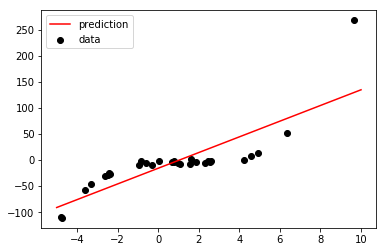

n = 2 :  Y ~ np.power(X,1) + np.power(X,2) 


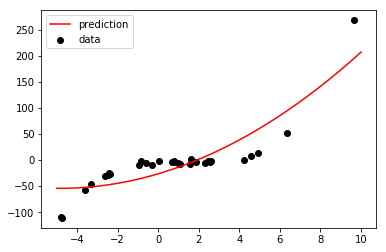

n = 3 :  Y ~ np.power(X,1) + np.power(X,2) + np.power(X,3) 


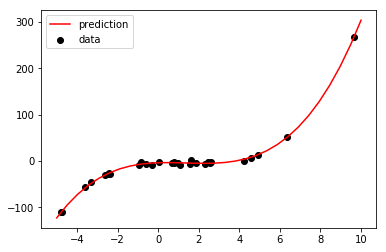

n = 4 :  Y ~ np.power(X,1) + np.power(X,2) + np.power(X,3) + np.power(X,4) 


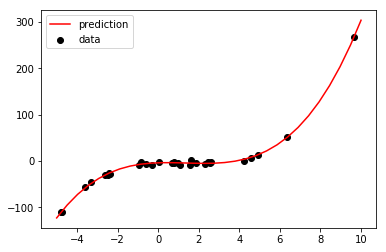

n = 7 :  Y ~ np.power(X,1) + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6) + np.power(X,7) 


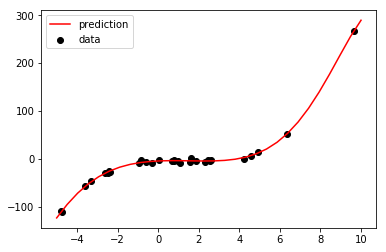

n = 10 :  Y ~ np.power(X,1) + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6) + np.power(X,7) + np.power(X,8) + np.power(X,9) + np.power(X,10) 


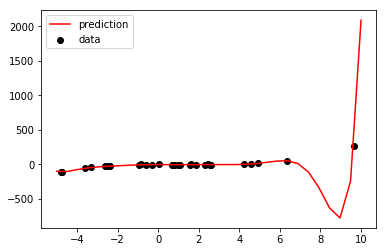

n = 15 :  Y ~ np.power(X,1) + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6) + np.power(X,7) + np.power(X,8) + np.power(X,9) + np.power(X,10) + np.power(X,11) + np.power(X,12) + np.power(X,13) + np.power(X,14) + np.power(X,15) 


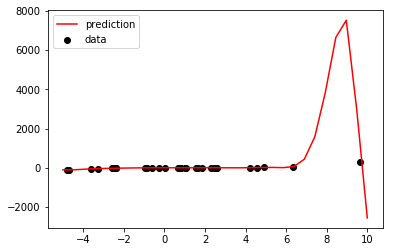

n = 20 :  Y ~ np.power(X,1) + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6) + np.power(X,7) + np.power(X,8) + np.power(X,9) + np.power(X,10) + np.power(X,11) + np.power(X,12) + np.power(X,13) + np.power(X,14) + np.power(X,15) + np.power(X,16) + np.power(X,17) + np.power(X,18) + np.power(X,19) + np.power(X,20) 


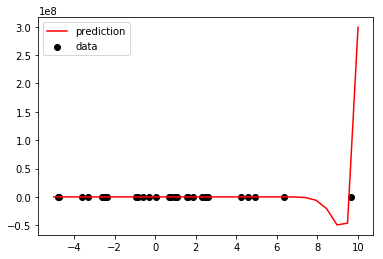

n = 30 :  Y ~ np.power(X,1) + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6) + np.power(X,7) + np.power(X,8) + np.power(X,9) + np.power(X,10) + np.power(X,11) + np.power(X,12) + np.power(X,13) + np.power(X,14) + np.power(X,15) + np.power(X,16) + np.power(X,17) + np.power(X,18) + np.power(X,19) + np.power(X,20) + np.power(X,21) + np.power(X,22) + np.power(X,23) + np.power(X,24) + np.power(X,25) + np.power(X,26) + np.power(X,27) + np.power(X,28) + np.power(X,29) + np.power(X,30) 


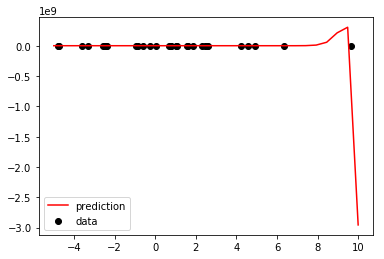

In [48]:
#correr una regresión lineal para cada n y graficarlo
import statsmodels.formula.api as smf

lista_n=[1,2,3,4,7,10,15,20,30]
modelos_lineales=[]

for n in lista_n:
    
    #a)
    formula_reg="Y ~"
    for i in range(1,n+1):
        formula_reg+= ' np.power(X,'+str(i)+') +'    
    formula_reg=formula_reg[:-1] #quitar el último +
    
    print("n =",n,": ",formula_reg)
    
    
    reg = smf.ols(formula = formula_reg, data=data_df[['Y','X']],missing='drop',hasconst=True)
    lin_mod = reg.fit()
    
    #b)usualmente se genera una serie de grande datos uniformes en el intervalo para graficar una línea
    dict_predict={'X':np.linspace(-5,10,30)}
    x_predict= pd.DataFrame(dict_predict)
    y_predict=lin_mod.predict(x_predict)
    
    plt.scatter(X,Y,color='black',label='data') #graficar datos
    plt.plot(x_predict,y_predict,color='red',label='prediction') #graficar datos del ajuste
    plt.legend()
    plt.show()

**3.** Utilizando las funciones `mean_squared_error` y `r2_score` de `sklearn.metrics` calcula la raíz del error cuadrático medio (RMSE) y el coeficiente de determinación ($R^2$)de los resultados de la regresión.<br/>

In [72]:
import sklearn.metrics as skm
? skm.r2_score

In [71]:
lista_rmse=[]
lista_r2=[]

for i,mod in enumerate(modelos_lineales):

    n = lista_n[i]
    
    x_predict=data_df['X']
    predict_df=generar_dataframe(x_predict,np.zeros(len(x_predict)),n).iloc[:,2:]
    predict_df=sm.add_constant(predict_df)
    
    y_predict=mod.predict(predict_df)
    y_actual=data_df['Y']
    
    mse= skm.mean_squared_error(y_actual,y_predict)
    rmse= np.sqrt(mse)
    lista_rmse.append(rmse)
    
    r2=skm.r2_score(y_actual,y_predict)
    lista_r2.append(r2)

/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py

**4.** Debido a que estamos utilizando una muestra pequeña de datos, puede existir algún sesgo en nuestras estimaciones.<br/> 
a) Repite el inciso 1, generando arreglos $X2$ y $Y2$ con las mismas fórmulas, pero ahora con 100 números aleatorios. 
 
b) Repite el inciso 3, comparando las predicciones de las regresiones del inciso 2 con los arreglos $X2$ y $Y2$.


In [99]:
#a)
#np.random.seed(10)
no_datos=100

X2 = 2 - 3 * np.random.normal(0, 1, no_datos) 
U2 = np.random.normal(-3, 3, no_datos)
data_df2=generar_dataframe(X2,U2,no_datos)
print(data_df2.shape)

(100, 102)


In [100]:
#b) 
lista_rmse_2=[]
lista_r2_2=[]

for i,mod in enumerate(modelos_lineales):

    n = lista_n[i]
    
    x_predict=data_df2['X']
    predict_df=generar_dataframe(x_predict,np.zeros(len(x_predict)),n).iloc[:,2:]
    predict_df=sm.add_constant(predict_df)
    
    y_predict=mod.predict(predict_df)
    y_actual=data_df2['Y']
    
    mse= skm.mean_squared_error(y_actual,y_predict) #comparar resultados de las primeras regresiones vs nuevos datos
    rmse= np.sqrt(mse)
    lista_rmse_2.append(rmse)
    
    r2=skm.r2_score(y_actual,y_predict)
    lista_r2_2.append(r2)

/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py

**5.** En una misma ventana, grafica los valores del RMSE que calculaste en los incisos 3 y 4b) en función del grado $n$ del polinomio. ¿Qué puedes concluir de esta gráfica? ¿Como podrías utilizar la gráfica para deducir el grado del polinomio utilizado si no lo conocieras?

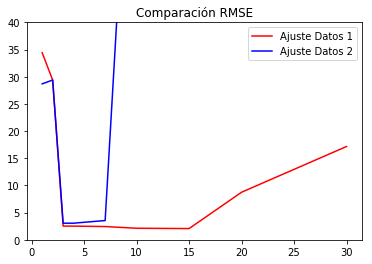

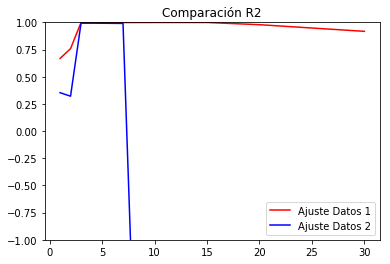

In [103]:
plt.plot(lista_n,lista_rmse,color='red',label='Ajuste Datos 1')
plt.plot(lista_n,lista_rmse_2,color='blue',label='Ajuste Datos 2')
plt.title("Comparación RMSE")
plt.ylim([0,40])
plt.legend()
plt.show()

plt.plot(lista_n,lista_r2,color='red',label='Ajuste Datos 1')
plt.plot(lista_n,lista_r2_2,color='blue',label='Ajuste Datos 2')
plt.title("Comparación R2")
plt.ylim([-1,1])
plt.legend()
plt.show()

Idealmente (eligiendo más valores de n) deberíamos obtener algo como esto:
    
<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png">

Fuente:  http://scott.fortmann-roe.com/docs/BiasVariance.html

# Problema 2: Ajuste de Distribuciones

En este inciso verificaremos la ley de los grandes números para las estimaciones de parámetros de distintas distribuciones. Utilizaremos la librería de `scipy.stats` para este problema. Puedes revisar [aquí](https://docs.scipy.org/doc/scipy/reference/stats.html) las diferentes funciones de la librería.

**1.** Utilizando la función `norm.rvs`, genera un arreglo de $n$ números con distribución normal $\mathcal{N}(\mu,\sigma^2)$, donde $\mu$ y $\sigma^2$ son parámetros que puedes elegir de manera arbitraria y $n$ toma valores igualmente espaciados entre 3 y 3000. **Hint:** Utiliza la función `linspace` de `numpy` y asegúrate de que los valores generados sean enteros. <br/>
**2.** Utiliza la función `norm.fit` para obtener $\mu$ y $\sigma^2$ de los datos generados en el inciso anterior.  <br/>
**3.** Utiliza la función `norm.pdf` para graficar la función de densidad de probabilidad y, en la misma ventana grafica el histograma de la función (normalizado). Para este inciso sólo toma 2 valores de $n$ (uno chico y uno grande).  <br/>

In [104]:
np.linspace(3,3000,2998)

array([   3.,    4.,    5., ..., 2998., 2999., 3000.])

In [105]:
np.arange(3,3000,1)

array([   3,    4,    5, ..., 2997, 2998, 2999])

In [107]:
np.linspace(3,3000,2000).astype(int)

array([   3,    4,    5, ..., 2997, 2998, 3000])

/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


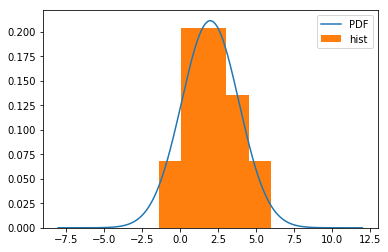

/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


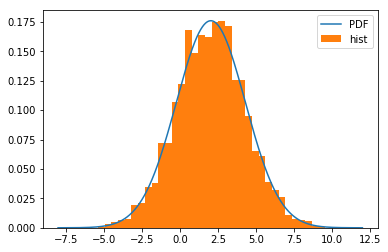

In [135]:
from scipy import stats

lista_n=np.linspace(3,3000,2998)#.astype(int)

mu=2
s2=5

lista_mu=[]
lista_s2=[]

for n in lista_n: 
    #1.
    rnd_data=stats.norm.rvs(mu,np.sqrt(s2),int(n))
    
    #2.
    m,s=stats.norm.fit(rnd_data)
    lista_s2.append(s**2)
    lista_mu.append(m)
    
    #3.
    if n==10 or n==2500: 
        lnspc=np.linspace(mu-10,mu+10,1000)

        pdf_g = stats.norm.pdf(lnspc, m, s) #generar datos según la distribución  
        plt.plot(lnspc, pdf_g, label="PDF")
        plt.hist(rnd_data,bins='auto',normed=True,label="hist")
        plt.legend()
        plt.show()

**4.** Grafica en una misma ventana los parámetros de la distribución en función de todos los valores de $n$. ¿Qué puedes decir a cerca del comportamiento de estos parámetros?  <br/>

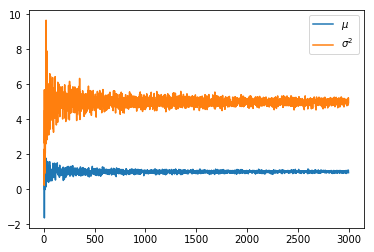

In [117]:
plt.plot(lista_n,lista_mu,label='$\mu$')
plt.plot(lista_n,lista_s2,label='$\sigma^2$')

plt.legend()
plt.show()

**5.** Repite los incisos 1,2,3 y 4 con las siguientes distribuciones: exponencial, chi-cuadrada, beta y gamma. <br/>

/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


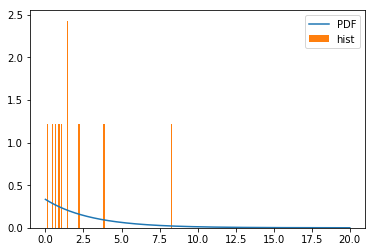

/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


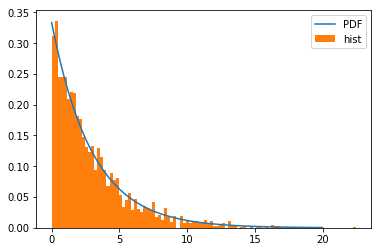

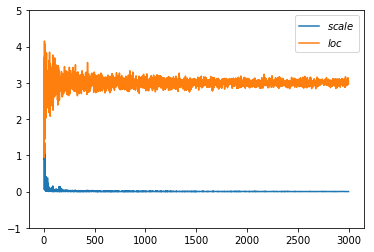

In [180]:
scale=3
loc=0
#lamb=3
lista_loc=[]
lista_scale=[]

for n in lista_n: 
    #1.
    rnd_data=stats.expon.rvs(loc,scale,int(n))
    
    #2.
    s,l=stats.expon.fit(rnd_data)
    lista_scale.append(s)
    lista_loc.append(l)
    
    #3.
    if n==10 or n==2500: 
        lnspc=np.linspace(0,20,1000)
        
        pdf_g = stats.expon.pdf(lnspc,loc,scale) #generar datos según la distribución  
        plt.plot(lnspc, pdf_g, label="PDF")
        plt.hist(rnd_data,bins=100,normed=True,label="hist")
        plt.legend()
        plt.show()
#4.
plt.plot(lista_n,lista_scale,label='$scale$')
plt.plot(lista_n,lista_loc,label='$loc$')
plt.ylim([-1,5])
plt.legend()
plt.show()

/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


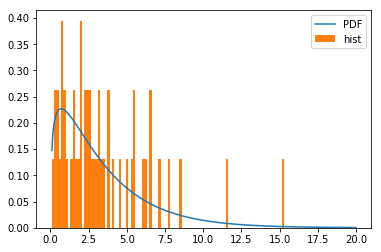

/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


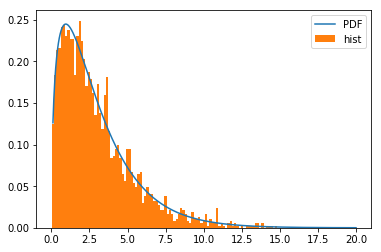

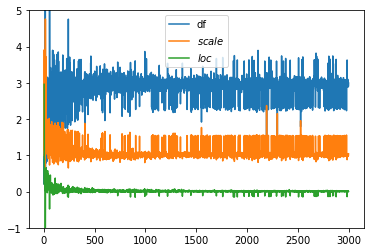

In [181]:
df,loc,scale=(3,0,1)

lista_df=[]
lista_loc=[]
lista_scale=[]

for n in lista_n: 
    #1.
    rnd_data=stats.chi2.rvs(df,loc,scale,int(n))
    
    #2.
    a,b,c=stats.chi2.fit(rnd_data)
    lista_df.append(a)
    lista_loc.append(b)
    lista_scale.append(c)
    
    #3.
    if n==50 or n==2500: 
        lnspc=np.linspace(0.1,20,1000)
        
        pdf_g = stats.chi2.pdf(lnspc,a,b,c) #generar datos según la distribución  
        plt.plot(lnspc, pdf_g, label="PDF")
        plt.hist(rnd_data,bins=100,normed=True,label="hist")
        plt.legend()
        plt.show()
#4.        
plt.plot(lista_n,lista_df,label="df")        
plt.plot(lista_n,lista_scale,label='$scale$')
plt.plot(lista_n,lista_loc,label='$loc$')
plt.ylim([-1,5])
plt.legend()
plt.show()

/home/arturo/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
/home/arturo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


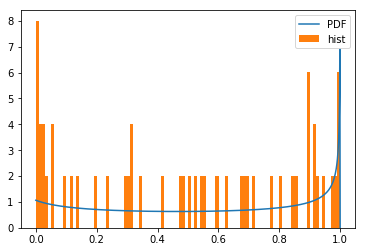

/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


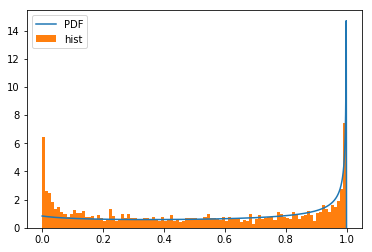

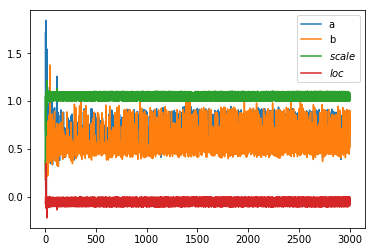

In [186]:
a,b,loc,scale=(0.5,0.5,0,1)

lista_a=[]
lista_b=[]
lista_loc=[]
lista_scale=[]

for n in lista_n: 
    #1.
    rnd_data=stats.beta.rvs(a,b,loc,scale,int(n))
    
    #2.
    a1,b1,c1,d1=stats.beta.fit(rnd_data)
    lista_a.append(a1)
    lista_b.append(b1)
    lista_loc.append(c1)
    lista_scale.append(d1)
    
    #3.
    if n==50 or n==2000: 
        lnspc=np.linspace(0,1,1000)
        
        pdf_g = stats.beta.pdf(lnspc,a1,b1,c1,d1) #generar datos según la distribución  
        plt.plot(lnspc, pdf_g, label="PDF")
        plt.hist(rnd_data,bins=100,normed=True,label="hist")
        plt.legend()
        plt.show()
#4.        
plt.plot(lista_n,lista_a,label="a")
plt.plot(lista_n,lista_b,label="b")        
plt.plot(lista_n,lista_scale,label='$scale$')
plt.plot(lista_n,lista_loc,label='$loc$')
#plt.ylim([-1,5])
plt.legend()
plt.show()

/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


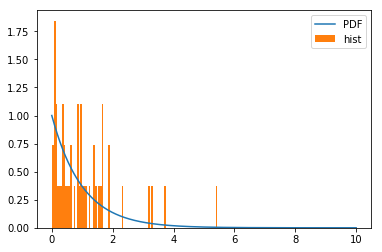

/home/arturo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


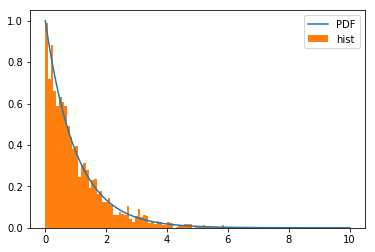

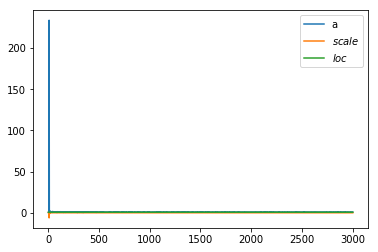

In [190]:
a,loc,scale=(1,0,1)

lista_a=[]
lista_loc=[]
lista_scale=[]

for n in lista_n: 
    #1.
    rnd_data=stats.gamma.rvs(a,loc,scale,int(n))
    
    #2.
    a1,c1,d1=stats.gamma.fit(rnd_data)
    lista_a.append(a1)
    lista_loc.append(b1)
    lista_scale.append(c1)
    
    #3.
    if n==50 or n==2000: 
        lnspc=np.linspace(0,10,1000)
        
        pdf_g = stats.gamma.pdf(lnspc,a,loc,scale) #generar datos según la distribución  
        plt.plot(lnspc, pdf_g, label="PDF")
        plt.hist(rnd_data,bins=100,normed=True,label="hist")
        plt.legend()
        plt.show()
#4.        
plt.plot(lista_n,lista_a,label="a")
plt.plot(lista_n,lista_scale,label='$scale$')
plt.plot(lista_n,lista_loc,label='$loc$')
#plt.ylim([-1,5])
plt.legend()
plt.show()

# Problema 3: Regresión Discontinua


Recordar el uso de regresión discontinua: Este método se usa para estimar un efecto causal en los casos en que una prueba aleatoria no es posible.


La Regresión discontinua se usa cuando algún tipo de corte determina quién entra en un grupo en lugar de otro. En lugar de analizar el efecto del predictor en el resultado para toda la población, comparamos los resultados previstos en ambos lados del corte.

Este problem set se fundamenta en el paper de Joshua Angrist and Victor Lavy (REVISARLO): "[Using Maimonides Rule' to Estimate the Effect of Class Size on Scholastic Achievement](http://qje.oxfordjournals.org/content/114/2/533.short)." En este paper los autores señalan que no es posible aleatorizar la asignación en el tamaño de la clase pero pudieron *aprovechar* una regla en las escuelas israelíes que dividía las clases en tamaños más pequeños si la inscripción era de 41 o más. 
Esto ofreció a Angrist y Lavy un experimento natural para su pregunta de investigación, ya que podríamos esperar que los grupos cercanos a 40 alumnos fueran muy similares a los de 42.


**El análisis de Regresión Discontinua** utiliza observaciones lejos del *cuttoff* junto con otras más cercanas "con el objetivo de *proyectar* el efecto estimado del tratamiento en el *cuttoff*". 

**1.** Adicional a los supuestos del modelo de regresión lineal, menciona como validarías (comprobar) que se cumplen los supuestos en el modelo de regresión discontinua de Angrist & Levy:

* A) El cuttoff es tan bueno como aleatorizar. Para verificar esto, podemos:
    * Observar si hay o no un sesgo en la selección del corte. Para esto se puede utilizar la [Prueba de Densidad McCrary](http://eml.berkeley.edu/~jmccrary/mccrary2006_DCdensity.pdf) a ambos lados del corte. También puedes revisar el artículo de Urquiola & Verhoogen (2009) "[Class-Size Caps, Sorting, and the Regression-Discontinuity Design](http://www.columbia.edu/~ev2124/research/Urquiola%26VerhoogenAER2009.pdf)", para explorar más a fondo cómo detectar estos sesgos.
    * Conformar que no hay ninguna influiencia no observada (en el caso de Angrist & Lavy, los autores consideran una posible relación entre estatus socio-económico de una región y el tamaño del cohorte.  
* B) Supuesto: El modelo está bien especificado, inclusive al limitar las observaciones de "ancho de banda (bandwidth)" en ambos lados del corte.
    * Analisis de la sensibilidad según el ancho de banda.
    * Sensibilidad a modelos que adoptan una variedad de formas funcionales.


### Variables del modelo
En este análisis, examinos un dataset que incluye datos del nivel de escolaridad para:
* *size*: tamaño de los grupos de 5 año
* *intended_classsize*: Promedio destinado al tamaño de clase por cada escuela
* *observed_classize*: Promedio obserdado del tamaño de la clase por cada escuela
* *read*: Promedio de lectura obtenido

**2.** Carga las siguientes librerías y comenta en una línea su uso

In [41]:
import codecs                     # load UTF-8 Content
import json                       # load JSON files
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for beautiful plots
from dateutil import *            # I prefer dateutil for parsing dates
import math                       # transformations
import statsmodels.formula.api as smf  # for doing statistical regression
import statsmodels.api as sm      # access to the wider statsmodels library, including R datasets
from collections import Counter   # Counter is useful for grouping and counting
import scipy

**3.** Utiliza la función `read_csv` de `pandas` para cargar el archivo `class_size.csv` que viene incluido en la carpeta de este ejercicio (utiliza el parámetro `delimiter` para separar adecuadamente las columnas). Tambien se incluye en formato de SAS por si quieren probar otros tipos de archivos. <br/>

In [193]:
import sas7bdat
from sas7bdat import *
foo = SAS7BDAT('class_size.sas7bdat')
# This converts to dataframe:
class_df = foo.to_data_frame()

**4.** Obten media, desviación estándar, quartiles para las variables: read, size, intended_classize y observed_classize.

In [194]:
class_df.describe()

,read,size,intended_classize,observed_classize
count,2019.000000,2019.000000,2019.000000,2019.000000
mean,74.379171,77.741951,30.955935,29.935116
std,7.678460,38.810731,6.107924,6.545885
min,34.799999,8.000000,8.000000,8.000000
25%,69.855000,50.000000,27.000000,26.000000
50%,75.379997,72.000000,31.666666,31.000000
75%,79.839996,100.000000,35.666668,35.000000
max,93.860001,226.000000,40.000000,44.000000


La variable (*csize*) se utilizará como variable que los individuos no pueden controlar. Antes de iniciar una regresión discontinua, se debe contruir el "ancho" o ventana de tiempo. En este caso será grupos con clase >= 36 y <= 46. El modelo será:

$$ read = b_0 + b_1 csize+ b_2 small + u. $$

**5.** Interpreta y comenta cada una de las funciones del siguiente código y córrelo:

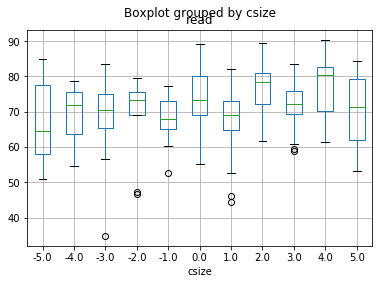

In [195]:
###Función 1
def small(size):
    if(size>=41):
        return 1
    return 0

###Función 2
def first(group):
    groups = {1: 0, 2:0,
              3: 1, 4:1}
    return groups[group]

###Función 3
class_df['small'] = class_df['size'].map(small)
class_df['csize'] = class_df['size'].map(lambda x: x-41)

###Función 4
class_df[(class_df['size']>=36) & (class_df['size']<=46)].boxplot("read", "csize")
plt.show()

**6.** Describe e interpreta los resultados del Boxplot. ¿Qué información relevante aporta esta visualización en la validación del modelo de regresión discontinua?

In [196]:
window = class_df[(class_df['size']>=29) & (class_df['size']<=53)]

**7.** Con el dataset del incisio anterior, corre la regresión discontinua con variables dependiendes csize y small. Variable independiente read.

In [197]:
result = smf.ols(formula = "read ~ csize + small", 
                 data = window).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                   read   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.103
Date:                Thu, 14 Feb 2019   Prob (F-statistic):             0.0459
Time:                        20:40:40   Log-Likelihood:                -1536.6
No. Observations:                 423   AIC:                             3079.
Df Residuals:                     420   BIC:                             3091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.1188      1.151     60.908      0.0

**8.** Utiliza la función plt.figure, plt.scatter para visualizar la regresión discontinua antes y después del punto de corte para las variables read y classize. El gráfico debe visualizar el punto de corte generado por el tamaño de la clase.

Text(0.5,1,'Regression Discontinuity: Reading Scores by Class Size Before and After the Cutoff')

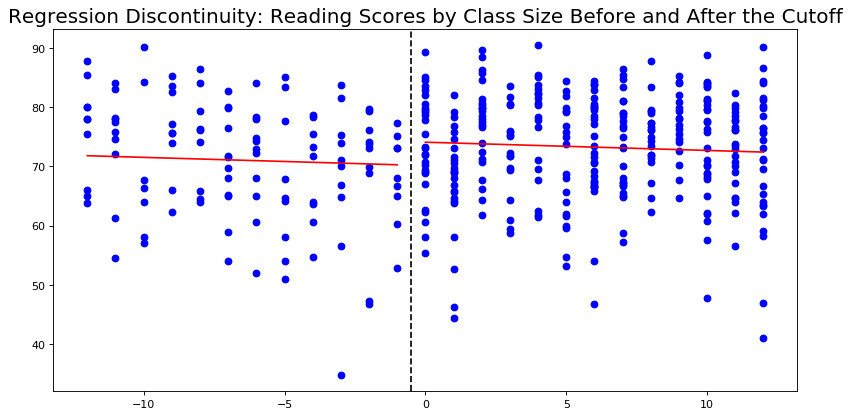

In [198]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(window.csize,window.read, color="blue")
l=window[window.csize<0].csize.count()
plt.plot(window.csize[0:l], result.predict()[0:l], '-', color="r")
plt.plot(window.csize[l:], result.predict()[l:], '-', color="r")
plt.axvline(x=-0.5,color="black", linestyle="--")
plt.title("Regression Discontinuity: Reading Scores by Class Size Before and After the Cutoff", fontsize="18")

**9.** Reporta el coeficiente de la variable small. Interpreta el efecto marginal de la variable small sobre el promedio de lectura.

El parámetro resultó: -0.1392    

**10.** Los efectos del tamaño de la clase en los promedios de lectura son estadísticamente significativos?. Reporta resultados para (p<0.05). Intepreta intuitivamente la prueba de Durbin-Watson que aparece en la tabla de resultados de la regresión.

# Problema 4: Variables Instrumentales

En estadística, econometría, epidemiología y campos afines, el método de variables instrumentales (IV) se utiliza para estimar las relaciones causales cuando no se pueden realizar experimentos controlados, o cuando un tratamiento no se administra exitosamente a cada unidad de un experimento aleatorio.

**1.** Menciona los dos requerimientos para utilizar variables instrumentales (IV) en modelos lineales.

En este caso, utilizaremos el grado universitario (COLLEGE) para predecir la probabilidad de participación cívica (REGISTER), medida mediante el registro de votantes. El grado universitario no está aleatorizado, y la flecha que indica la causalidad puede apuntar en sentido opuesto, así que lo único que podemos hacer con la regresión es estrablecer una correlación.

Importa:

In [1]:
import codecs                     
import json                       
import pandas as pd               
import numpy as np               
import matplotlib.pyplot as plt   
import seaborn as sns             
from dateutil import *           
import math                       
import statsmodels.formula.api as smf  
import statsmodels.api as sm      
from collections import Counter   
import scipy

**2.** Lee el archivo `iv.csv` (para este punto ya deberías estar familiarizado con los comandos para hacer esto). Obtén los estadísticos básicos: media, desviación estándar y cuartiles para: 'register','college', 'distance'.

In [2]:
ds=pd.read_csv('iv.csv',delimiter='\t').iloc[:,1:]
ds.describe()

,schoolid,hispanic,college,black,otherrace,female,register,distance
count,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000,9227.000000
mean,5406.414869,0.198873,0.547090,0.125393,0.049312,0.517178,0.670857,9.735992
std,2608.657780,0.399174,0.497805,0.331182,0.216530,0.499732,0.469927,8.702286
min,1032.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3141.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,5185.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,7.000000
75%,7688.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,15.000001
max,9978.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000


**3.** Utiliza el método `corr` de los DataFrames de Pandas para obtener una matriz de correlaciones de las variables del inciso anterior.

In [3]:
ds1 = ds[['register','college','distance']]
corr = ds1.corr().values
corr

array([[ 1.        ,  0.1874256 , -0.03346988],
       [ 0.1874256 ,  1.        , -0.11137305],
       [-0.03346988, -0.11137305,  1.        ]])

**4.** Corre una regresión lineal de REGISTER (Y) vs. COLLEGE(X) y reporta los resultados de la regresión. ¿El coeficiente de COLLEGE es estadísticamente significativo? Interpéta el coeficiente.

In [4]:
result = smf.ols(formula = "register ~ college", data = ds).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:               register   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     335.9
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.03e-73
Time:                        09:31:24   Log-Likelihood:                -5959.0
No. Observations:                9227   AIC:                         1.192e+04
Df Residuals:                    9225   BIC:                         1.194e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5741      0.007     80.391      0.0

En una regresión lineal de dos etapas (2SLSR) haremos una regresión de COLLEGE vs. DISTANCE y utilizaremos los resultados del modelo para predecir REGISTER. 

**5.** ETAPA 1: Realiza una regresión de COLLEGE (Y) vs. DISTANCE (X). Guarda los resultados predichos en el dataframe inicial como `college_fitted`. **Hint:** Utiliza `lin_mod.predict` como vimos en clase.

In [5]:
result = smf.ols(formula = "college ~ distance", data = ds).fit()
print (result.summary())
ds['college_fitted'] = result.predict()

                            OLS Regression Results                            
Dep. Variable:                college   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     115.9
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           7.35e-27
Time:                        09:31:32   Log-Likelihood:                -6598.2
No. Observations:                9227   AIC:                         1.320e+04
Df Residuals:                    9225   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6091      0.008     78.812      0.0

**6.** ETAPA 2: Realiza una regresión de REGISTER (Y) vs. COLLEGE_FITTED(X) y reporta los resultados en una tabla. Compara los valores de $R^2$ y la probabilidad $P$ e interpreta el coeficiente de COLLEGE_FITTED.

In [6]:
result = smf.ols(formula = "register ~ college_fitted", data=ds).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:               register   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.35
Date:                Fri, 15 Feb 2019   Prob (F-statistic):            0.00130
Time:                        09:31:37   Log-Likelihood:                -6118.9
No. Observations:                9227   AIC:                         1.224e+04
Df Residuals:                    9225   BIC:                         1.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5157      0.049     10.

Es de esperarse que exista una relación entre el grupo étnico al que pertenece una persona y la distancia que tiene que viajar a la universidad así como una relación enre el grupo étnico y el registro de votantes. Aunque el grupo étnico no cumple los requerimientos para considerarlo una variable instrumental, es  importante incluir covariables en ambasetapas de la regresión.

**7.** Repite los incisos 5 y 6, i.e. la regresión en 2 etapas, pero ahora utiliza el siguiente modelo de especificación: REGISTER ~ COLLEGE + BLACK + HISPANIC + OTHERRACE, tomando igualmente, la variable DISTANCE como la variable instrumental.

**8.** Compara los modelos. Elije uno de ellos y justifica tu elección.

In [7]:
result = smf.ols(formula = "college ~ distance + black + hispanic + otherrace", data = ds).fit()
print (result.summary())
ds['college_fitted'] = result.predict()

result = smf.ols(formula = "register ~ college_fitted + black + hispanic + otherrace", data=ds).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                college   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     51.24
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           9.75e-43
Time:                        09:31:40   Log-Likelihood:                -6554.4
No. Observations:                9227   AIC:                         1.312e+04
Df Residuals:                    9222   BIC:                         1.315e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6431      0.009     71.039      0.0

# Comentario de la Clase Anterior

¿ Cómo guardar las tablas obtenidas con `result.summary` y `result.summary2` en archivos?

In [10]:
type(result.summary())

statsmodels.iolib.summary.Summary

Se puede llamar el atributo `tables` para obtener una lista de las tablas utilizadas

In [27]:
result.summary().tables

[<class 'statsmodels.iolib.table.SimpleTable'>,
 <class 'statsmodels.iolib.table.SimpleTable'>,
 <class 'statsmodels.iolib.table.SimpleTable'>]

In [28]:
type(result.summary().tables[0]) #esto es una sola tabla

statsmodels.iolib.table.SimpleTable

In [30]:
summary_df=pd.DataFrame(result.summary().tables[0]) #la podemos convertir a dataframe de pandas
summary_df

,0,1,2,3
0,Dep. Variable:,register,R-squared:,0.005
1,Model:,OLS,Adj. R-squared:,0.004
2,Method:,Least Squares,F-statistic:,10.53
3,Date:,"Fri, 15 Feb 2019",Prob (F-statistic):,1.65e-08
4,Time:,09:41:32,Log-Likelihood:,-6103.0
5,No. Observations:,9227,AIC:,1.222e+04
6,Df Residuals:,9222,BIC:,1.225e+04
7,Df Model:,4,,
8,Covariance Type:,nonrobust,,


In [ ]:
summary_df.to_excel("resumen_regresion1.xlsx") #la podemos guardar en excel

In [31]:
? result.save #también podemos guardar el modelo lineal en sí en un archivo para usarlo posteriormente

Object ` result.save #también podemos guardar el modelo lineal en sí en un archivo para usarlo posteriormente` not found.
